Вариант 6:
$$\ddot{u} - 2u + e^u - 1 = 0$$

Система:
$$
\begin{cases}
    \dot{u} = v\\
    \dot{v} = 2u - e^u + 1
\end{cases}
$$

Первый интеграл:
$$H(u,\, \dot{u}) = \frac{1}{2}\dot{u}^2 - u^2 + e^u - u = C$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

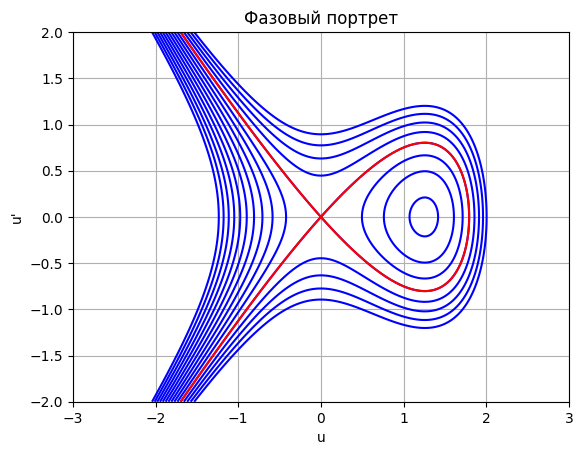

In [2]:
n = 1000
x = np.linspace(-3, 3, n)
y = np.linspace(-2, 2, n)
X, Y = np.meshgrid(x, y)

constants = np.arange(0, 1.5, 0.1)

for C in constants:
    Z = Y ** 2 / 2 - X ** 2 + np.exp(X) - X - C
    plt.contour(X, Y, Z, [0], colors='b')

Z = Y ** 2 / 2 - X ** 2 + np.exp(X) - X - 1
plt.contour(X, Y, Z, [0], colors='r')
plt.title("Фазовый портрет")
plt.xlabel("u")
plt.ylabel("u'")
plt.grid(True)

Можно заметить, что график симметричен относительно прямой $\dot{u} = 0$. Состояние равновесия будет на этой прямой.
Теперь рассмотрю первый интеграл при $\dot{u} = 0$, как функцию с параметром $C$. Можно заметить, что изменяя параметр $C$ можно получить разное количество решений у $H(u,\, 0) = C$. Мы имеем дело с бифуркацией. Для наглядности нарисую несколько графиков.

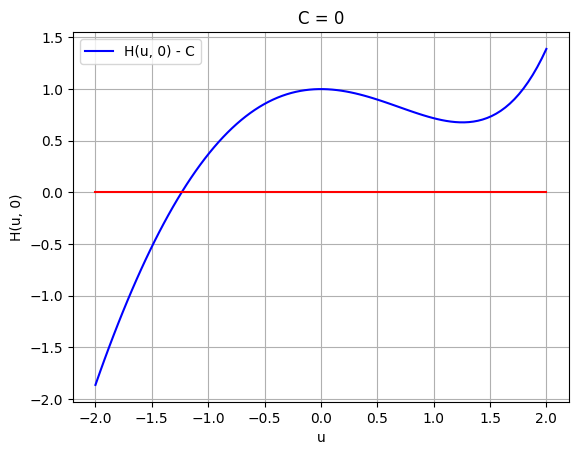

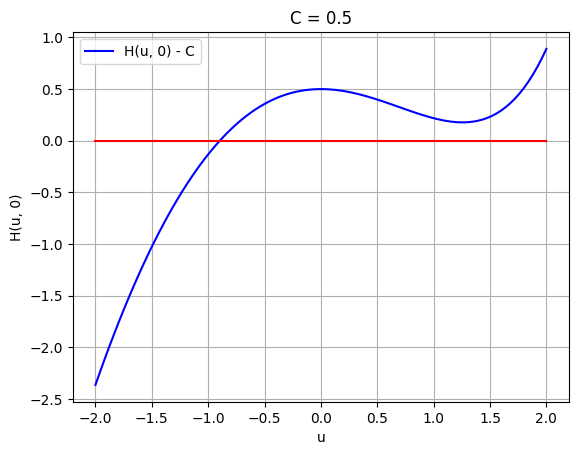

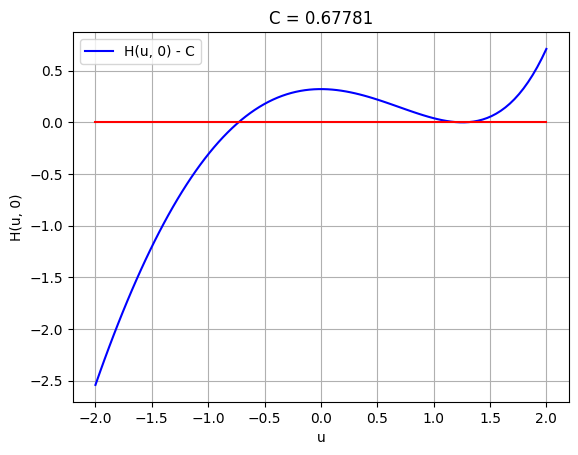

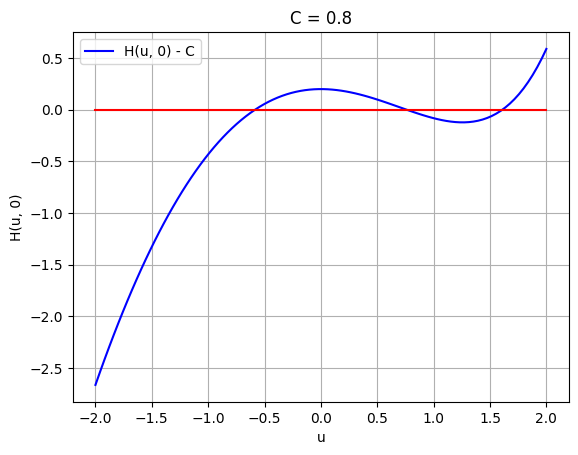

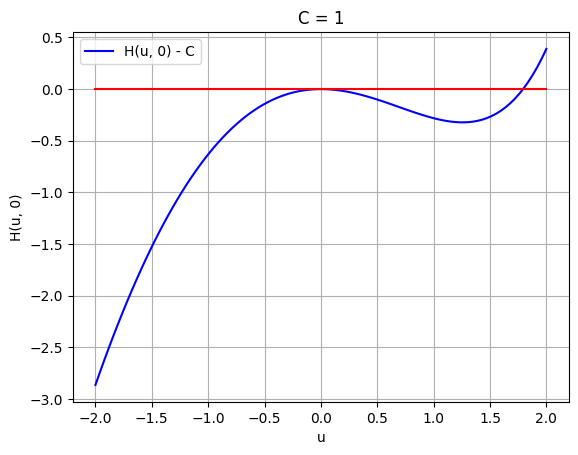

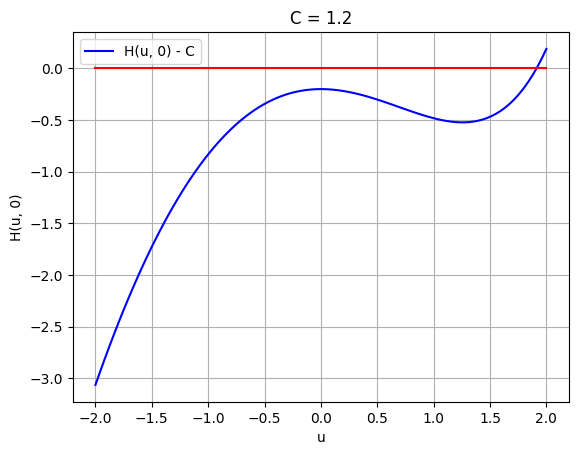

In [3]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-0.5, 1, 100)
H = lambda C: - x ** 2 + np.exp(x) - x - C

constants = [0, 0.5, 0.67781, 0.8, 1, 1.2]
for C in constants:
    plt.figure()
    plt.plot(x, H(C), color="b", label="H(u, 0) - C")
    plt.plot(x, [0 for i in x], color="r")
    plt.legend()
    plt.title(f"C = {C}")
    plt.xlabel("u")
    plt.ylabel("H(u, 0)")
    plt.grid(True)

Бифуркационному значению $C \approx 0.67781$ соответствует состояние равновесия (типа центр).

Второе бифуркационное значение будет $C = 1$, которое соответствует сепаратрисе.

Периодическим решениям будут соответствовать константы между состоянием равновесия и сепаратрисой, то есть: $0.67781 < C < 1,\, u(t) > 0$

Какие-то решения будут при остальных значениях $C$: $C < 0.67781,\ \ \ \ \ \ 0.67781 < C < 1,\, u(t) < 0,\ \ \ \ \ \ C > 1$

Возьму следующие начальные условия $(u_0,\, u'_0)$:
1) Периодические решения: $(1,\, 0),\ (0.25,\, 0)$
2) Какие-то решения: $(-1,\, 1.5),\ (-1,\, 0.5)$
3) Сепаратриса. Пусть $u = \varepsilon$, тогда $u' \approx \varepsilon$

In [4]:
def func(y, t):
    u, v = y
    dydt = [v, 2 * u - np.exp(u) + 1]
    return dydt

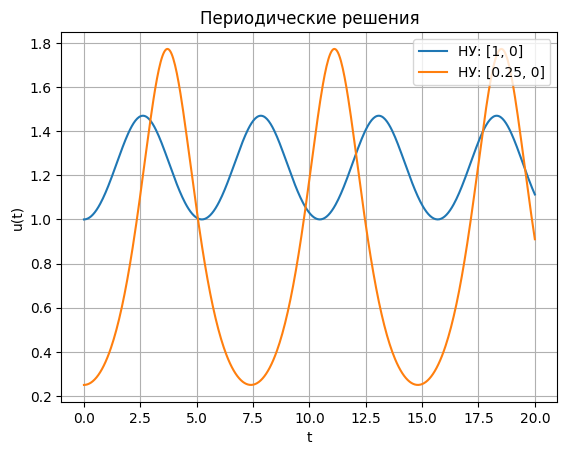

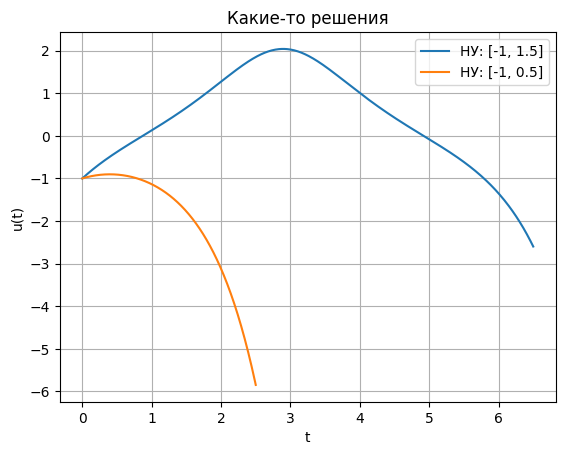

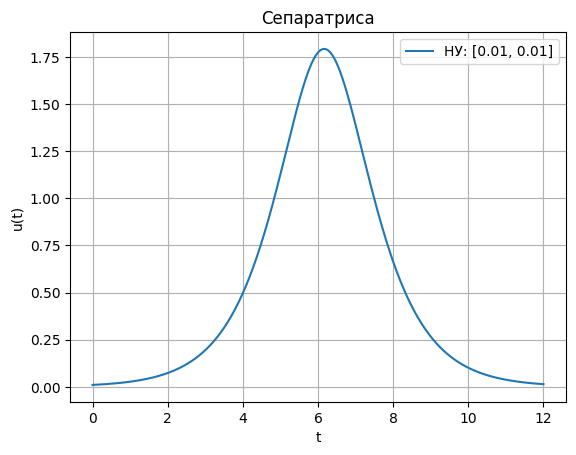

In [5]:
cauchy = [[1, 0], [0.25, 0], [-1, 1.5], [-1, 0.5], [0.01, 0.01]]
time = [(0, 20), (0, 20), (0, 6.5), (0, 2.5), (0, 12)]
titles = ['Периодические решения', 'Какие-то решения', 'Сепаратриса']

for i in range(len(time)):
    y0 = cauchy[i]
    t = np.linspace(time[i][0], time[i][1], 501)
    sol = sc.integrate.odeint(func, y0, t)
    if (i + 1) % 2:
        plt.figure()
        plt.xlabel('t')
        plt.ylabel('u(t)')
        plt.title(titles[i // 2])
        plt.grid(True)
    
    plt.plot(t, sol[:, 0], label=f'НУ: {y0}')
    plt.legend()